In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('advertising_ef.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


# Data Preprocessing

Dealing with Null Values

In [4]:
data.isna().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

There are null values present inside some of the columns of the dataset

In [5]:
data.rename(columns={'Daily Time Spent on Site':'Daily_Time_Spent_on_Site'}, inplace=True)

In [6]:
print(data['Daily_Time_Spent_on_Site'].mean())
print(data['Daily_Time_Spent_on_Site'].median())

65.00946268656728
68.37


In [7]:
data['Daily_Time_Spent_on_Site'].fillna(data['Daily_Time_Spent_on_Site'].median(),inplace=True)

Imputed ands replaced the null values of Daily Time Spent On Site with its Median

In [8]:
print(data['Age'].mean())
print(data['Age'].median())

35.96292585170341
35.0


Here we have checked for the mean and median value of Age column to find with which we can replace our null values

In [9]:
data['Age'].fillna(data['Age'].median(),inplace=True)

Since Age cannot be in decimals so we consider the median of Age column to replace null values

Similiarly we check For 'Area Income' column

In [10]:
print(data['Area Income'].mean())
print(data['Area Income'].median())

54958.573617234484
56998.245


In [11]:
data['Area Income'].fillna(data['Area Income'].mean(),inplace=True)

Filled the null values with the mean of Area Income and then rounding the numbers upto two decimals

In [12]:
data['Area Income'] = np.around(data['Area Income'],decimals=2)

In [13]:
data['Daily Internet Usage'].fillna(data['Daily Internet Usage'].mean(),inplace=True)

In [14]:
data['City'].value_counts().index[0]

'Williamsport'

In [15]:
data['City'].fillna(data['City'].value_counts().index[0],inplace=True)

In [16]:
data['Country'].value_counts().index[0]
data['Country'].fillna(data['Country'].value_counts().index[0],inplace=True)

In [17]:
data.isna().sum()

Daily_Time_Spent_on_Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

All the Null values have been imputed

Finding the Correlation Betweeen The Columns

In [18]:
data.corr()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Daily_Time_Spent_on_Site,1.000000,-0.327560,0.310296,0.514047,-0.742900
Age,-0.327560,1.000000,-0.178185,-0.366353,0.487808
Area Income,0.310296,-0.178185,1.000000,0.331394,-0.472515
Daily Internet Usage,0.514047,-0.366353,0.331394,1.000000,-0.785501
Clicked on Ad,-0.742900,0.487808,-0.472515,-0.785501,1.000000


In [19]:
import seaborn as sns

<AxesSubplot:>

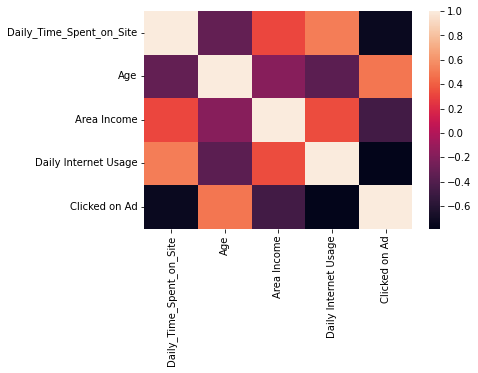

In [20]:
sns.heatmap(data.corr())

C:\Users\pkhus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

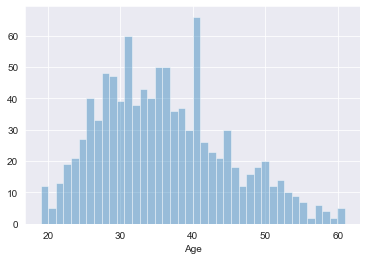

In [21]:
sns.set_style('darkgrid')
sns.distplot(data['Age'], kde=False, bins=40)

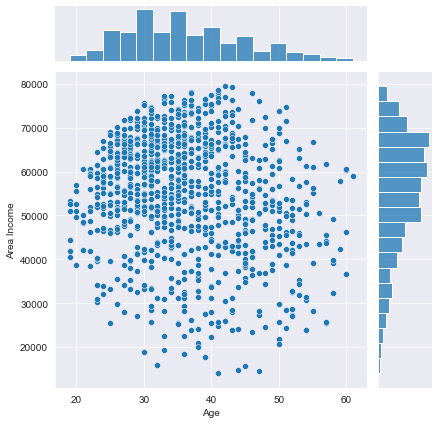

In [22]:
sns.jointplot(x='Age', y='Area Income', data=data)

Analysing Joint Plot Between Area Income column and Age Column

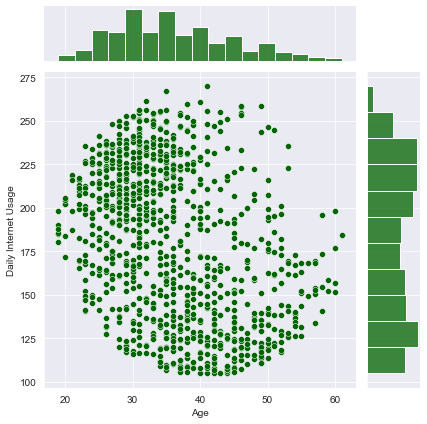

In [23]:
sns.jointplot(x='Age', y='Daily Internet Usage', data=data, color='darkgreen')

Analysing Joint Plot Between Daily Internet Usage Column and Age Column

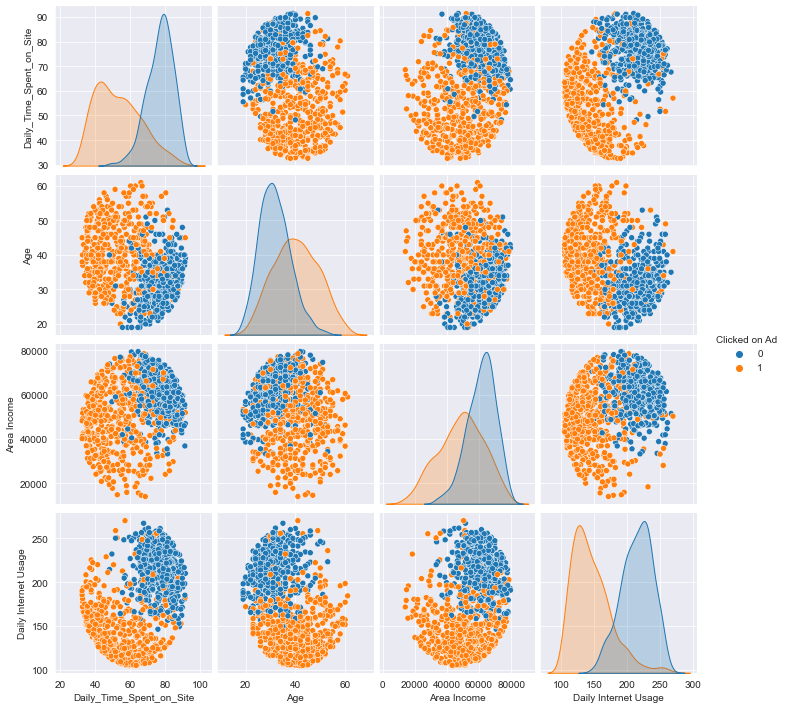

In [24]:
sns.pairplot(data, hue='Clicked on Ad')

Analysing the relation between each and every variable present in the dataset with target function Clicked On Ad

Checking Whether There is Class imbalance in the Dataset

In [25]:
data['Clicked on Ad'].value_counts()

1    506
0    503
Name: Clicked on Ad, dtype: int64

In [26]:
data.to_csv('Cleaned_Advertisements.csv')

The occurence of '1' is 506 and of '0' is 503. So there is not much difference and there both are equally probable in the dataset 

Here we take our Cleaned Dataset On which we have applied Preprocessing

# Data Modelling

In [27]:
data = pd.read_csv('Cleaned_Advertisements.csv')

In [28]:
data.head()

,Unnamed: 0,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1009 non-null   int64  
 1   Daily_Time_Spent_on_Site  1009 non-null   float64
 2   Age                       1009 non-null   float64
 3   Area Income               1009 non-null   float64
 4   Daily Internet Usage      1009 non-null   float64
 5   Ad Topic Line             1009 non-null   object 
 6   City                      1009 non-null   object 
 7   Gender                    1009 non-null   object 
 8   Country                   1009 non-null   object 
 9   Timestamp                 1009 non-null   object 
 10  Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 86.8+ KB


Checking the number of unique values present in column AD Topic Line, City And Country

In [30]:
object_Dtype = ['Ad Topic Line', 'City', 'Country']
data[object_Dtype].describe(include=['O'])

,Ad Topic Line,City,Country
count,1009,1009,1009
unique,1000,961,237
top,Proactive non-volatile encryption,Williamsport,Czech Republic
freq,2,14,22


Here we can see these columns have many unique values in them which will make it difficult to find a pattern from these columns to make a suitable model for predictions.

So we reject the columns Ad Topic Line, City, Country 

Now checking for Time Stamp Column which is object Data type.
We Split the column into two different Columns Month and Hour. So that Our model can effectively Target the best timezone trends.

In [32]:
data.head()

,Unnamed: 0,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [33]:
data.rename(columns={'Unnamed: 0':'Unnamed'}, inplace=True)

Dropped The Unnamed:0 column from the dataset

In [34]:
data.drop('Unnamed',axis=1,inplace=True)

Label Encoding Gender Column using Label Encoder

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [37]:
data.head()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0


Our Dataset is a classification Dataset i.e. it predicts values ither '0' or '1' which is not clicked or clicked resp.

So the models which we can apply on our dataset could be :

Desicion Tree Classifier

Logistic Regression

SVM

Naive Bayes Classifier

Ensemble Model

Here we discard the Ensemble Method as there is no Class Imbalance in our dataset

In [45]:
from sklearn.model_selection import train_test_split
y = data['Clicked on Ad']
X = data.iloc[:,[0,1,2,3,6,9]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs')
logmodel.fit(X_train, y_train)

LogisticRegression()

In [73]:
predictions = logmodel.predict(X_test)
predictions

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report
accuracy_score(y_test,predictions)

0.9174917491749175

In [54]:
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       173
           1       0.92      0.88      0.90       130

    accuracy                           0.92       303
   macro avg       0.92      0.91      0.92       303
weighted avg       0.92      0.92      0.92       303

[[163  10]
 [ 15 115]]


In [55]:
from sklearn.model_selection import cross_val_score 
accuracies_logmodel = cross_val_score(estimator = logmodel, X = X_test, y = y_test, cv = 10) 
print("For Logistic Regression : ")
print(f"Mean of Accuracy Score on Test Data Using cross validation is {accuracies_logmodel.mean()}")
print(f"Standard Deviation of Accuracy Score on Test Data Using cross validation is {accuracies_logmodel.std()}")

For Logistic Regression : 
Mean of Accuracy Score on Test Data Using cross validation is 0.9505376344086022
Standard Deviation of Accuracy Score on Test Data Using cross validation is 0.047025034968059876


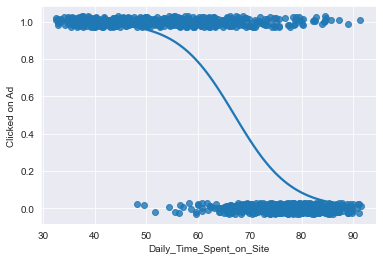

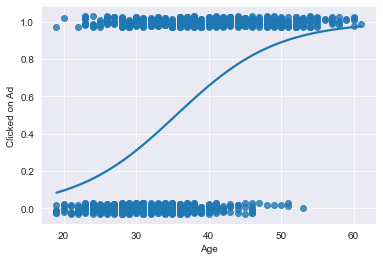

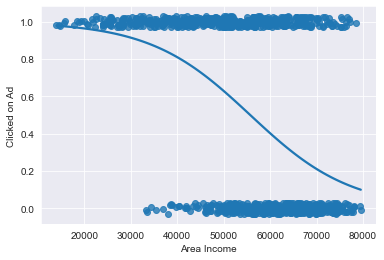

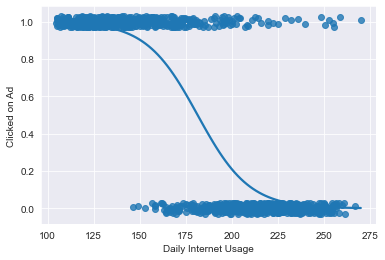

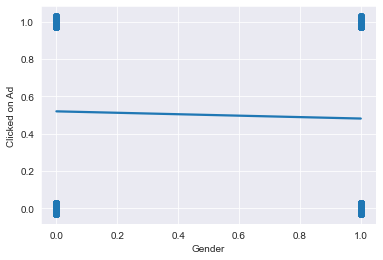

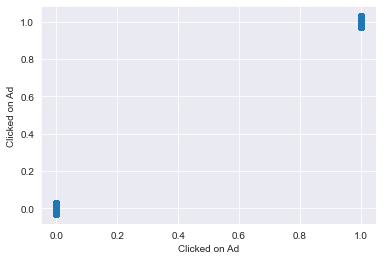

IndexError: single positional indexer is out-of-bounds

In [63]:
import seaborn as sns
list = [0,1,2,3,6,9,10]
for i in list:
    sns.regplot(x=data.iloc[:,i],y="Clicked on Ad",y_jitter=0.03,data=data,logistic=True,ci=None)
    plt.show()

In [64]:
logmodel.coef_,logmodel.intercept_

(array([[-5.83157695e-02,  2.53566429e-01, -1.03540544e-05,
         -2.46685562e-02,  1.69757276e-03,  2.06246098e-02]]),
 array([0.0053936]))

In [65]:
import pickle

In [68]:
pickle.dump(logmodel,open('logmodel.pkl','wb'))

In [71]:
pickle_model=pickle.load(open('logmodel.pkl','rb'))

In [79]:
pickle_model.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,